# Final Project DTS - Digna Tata Lukmana

dataset yang digunakan adalah data  Angka Kematian Ibu di Provinsi Jawa Tengah Tahun 2018 yang diperoleh dari www.bps.go.id. data berisi 12 variable sebagai berikut
1. Kabupaten/Kota
2. JKI - Jumlah Kematian Ibu
3. K1 - Kunjungan K1 (%)
4. K4 - Kunjungan K4 (%)
5. PDN - Persalinan Ditolong NaKes
6. Fe3 - Mendapat Tablet Fe3 (%)
7. KKD - Komplikasi Kebidanan Ditangani (%)
8. Rumah Tangga ber-PHBS (%)
9. MPN - Mendapat Pelayanan Nifas (%)
10. VitA - Mendapat Vitamin A (%)
11. Puskesmas - Banyak Puskesmas
12. TM - Banyak Tenaga Medis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_csv('D:/AKI.csv')
data.head()

,Kabupaten/Kota,JKI,K1,K4,PDN,Fe3,KKD,RT ber-PHBS,MPN,VitA,Puskesmas,TM
0,Kab. Cilacap,20,100.00,94.85,99.95,95.04,105.8,74.56,97.70,98.81,38,295
1,Kab. Banyumas,14,100.00,92.87,100.00,91.79,126.6,70.94,100.00,100.00,39,716
2,Kab. Purbalingga,11,100.00,95.71,99.71,90.09,96.3,76.66,92.89,99.06,22,233
3,Kab. Banjarnegara,21,94.05,85.48,98.54,86.41,151.6,68.47,96.76,82.29,35,170
4,Kab. Kebumen,12,100.00,95.50,99.77,98.83,110.3,78.32,98.98,99.89,35,572


In [3]:
data.shape

(35, 12)

data terdiri dari 35 baris yang mewakili banyaknya kabupaten/kota yang ada di jawa tengah dan 12 kolom yang mewakili variable dari data.

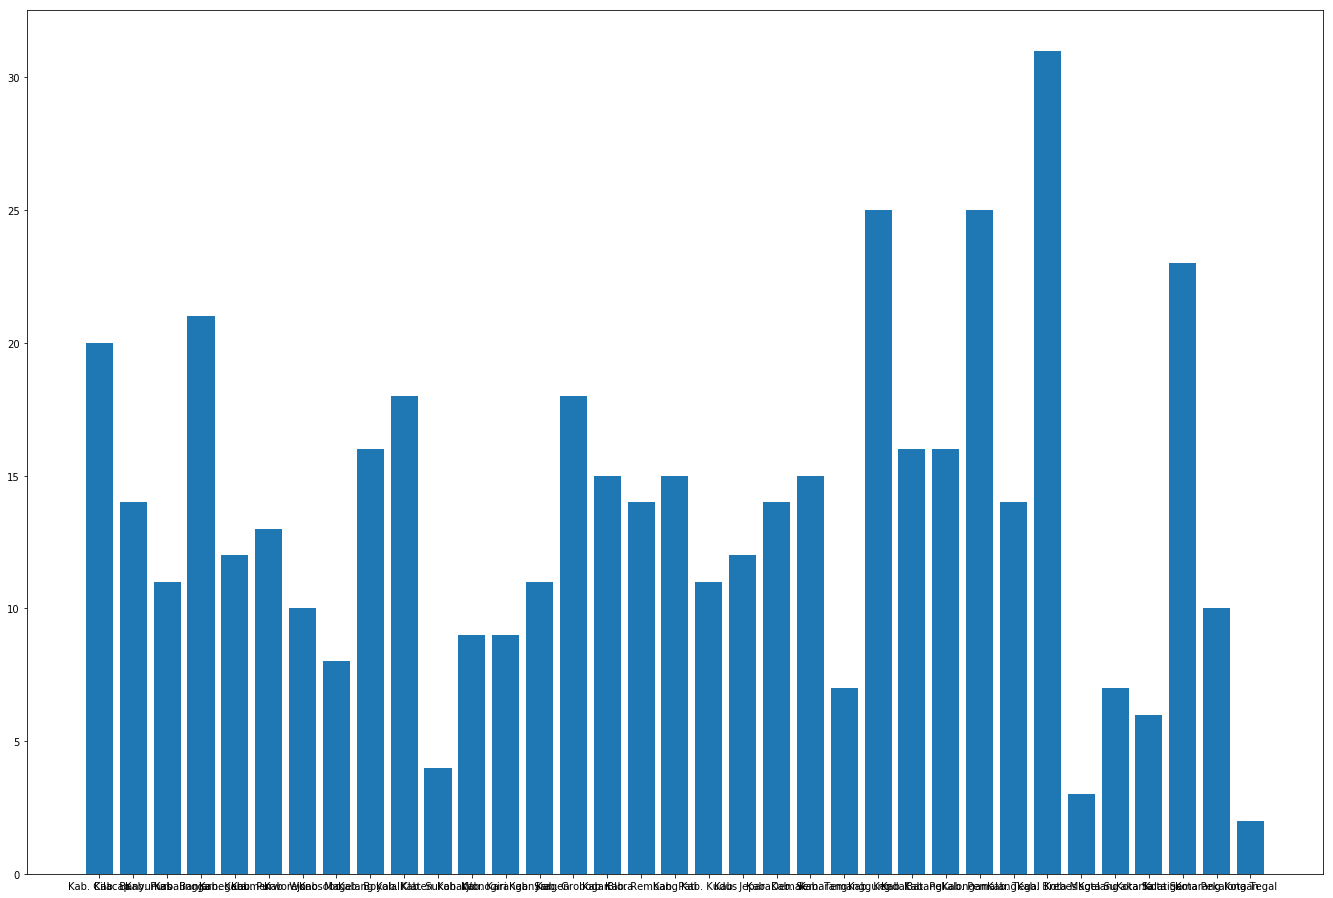

In [13]:
ab= data[['Kabupaten/Kota','JKI']]
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar(data['Kabupaten/Kota'],data['JKI'])
plt.show()

In [14]:
#melihat korelasi data
data.corr()

,JKI,K1,K4,PDN,Fe3,KKD,RT ber-PHBS,MPN,VitA,Puskesmas,TM
JKI,1.000000,-0.305172,-0.118469,-0.138810,-0.197945,0.060033,-0.417551,-0.443819,-0.294575,0.698622,0.096486
K1,-0.305172,1.000000,0.379576,-0.060438,0.480529,-0.155924,0.021542,-0.096061,0.080069,-0.280634,0.064719
K4,-0.118469,0.379576,1.000000,-0.099399,0.279846,-0.527628,0.104473,-0.149517,0.416374,-0.211490,0.088824
PDN,-0.138810,-0.060438,-0.099399,1.000000,-0.037703,0.138640,0.187917,0.462780,0.286215,-0.049973,-0.087579
Fe3,-0.197945,0.480529,0.279846,-0.037703,1.000000,-0.026775,0.275603,0.099171,0.027110,-0.243942,0.320864
KKD,0.060033,-0.155924,-0.527628,0.138640,-0.026775,1.000000,-0.238152,0.244534,-0.333274,0.149668,-0.206953
RT ber-PHBS,-0.417551,0.021542,0.104473,0.187917,0.275603,-0.238152,1.000000,0.205877,0.343945,-0.410298,0.335402
MPN,-0.443819,-0.096061,-0.149517,0.462780,0.099171,0.244534,0.205877,1.000000,0.227921,-0.289968,-0.332210
VitA,-0.294575,0.080069,0.416374,0.286215,0.027110,-0.333274,0.343945,0.227921,1.000000,-0.191602,0.078211
Puskesmas,0.698622,-0.280634,-0.211490,-0.049973,-0.243942,0.149668,-0.410298,-0.289968,-0.191602,1.000000,0.167137


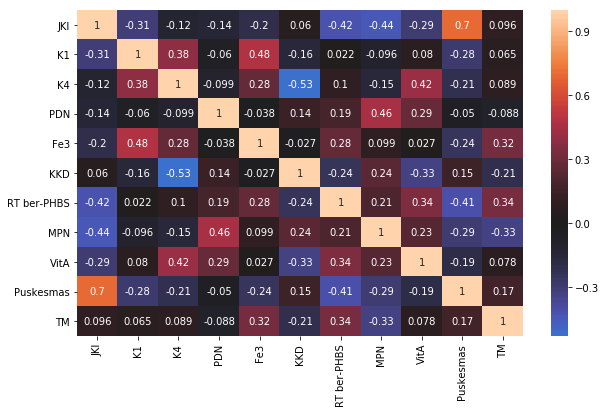

In [15]:
#visualisasi korelasi data
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, annot=True)

In [16]:
#regresi linier
import statsmodels
import patsy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

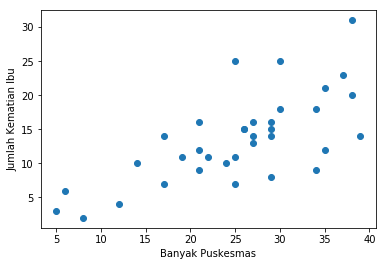

In [18]:
#scatter plot 
x = np.array(data['Puskesmas'])
y = np.array(data['JKI'])
plt.scatter(x, y)
#ax.view_init(0, 45)
plt.xlabel('Banyak Puskesmas')
plt.ylabel('Jumlah Kematian Ibu')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
regresi = LinearRegression()
train_x = np.array(data[['Puskesmas']])
train_y = np.array(data[['JKI']])
regresi.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', regresi.coef_)
print ('Intercept: ',regresi.intercept_)

Coefficients:  [[0.50369579]]
Intercept:  [0.89268589]


y=a+bx
Jumlah Kematian Ibu= 0.89268589+0.50369579(Puskesmas)

In [25]:
train_x = train_x.reshape(-1,1)
y_pred = regresi.predict(train_x)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_pred-train_y)))
print('MSE: %.4f' % mean_squared_error(train_y, y_pred))
from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(train_y, y_pred))

Mean absolute error: 3.30
MSE: 20.7487
R2-score: 0.49


# Clustering

In [26]:
X=data.filter(items=['JKI','Puskesmas'])
X.head()

,JKI,Puskesmas
0,20,38
1,14,39
2,11,22
3,21,35
4,12,35


In [27]:
X=X.values

In [29]:
!pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/d1/cf/6d6ab47c0759d246262f9bdb53e89be3814bf1774bc51fffff995f5859f9/yellowbrick-1.0.1-py3-none-any.whl


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [31]:
#mencari nilai berapa cluster optimal (k) dengan elbow silhoutte
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

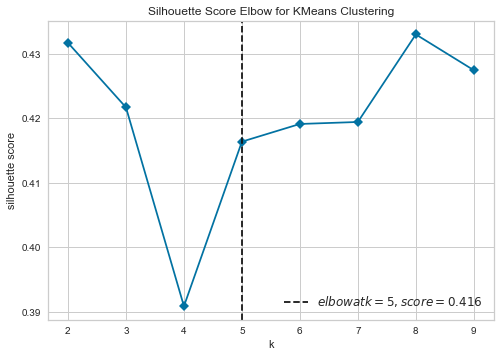

In [32]:
visualizer.fit(X)    
visualizer.poof()

In [33]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

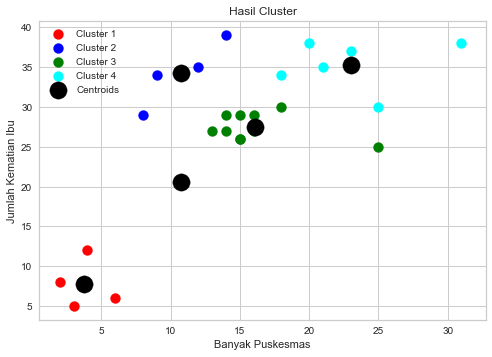

In [35]:
# Visualisasi clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Hasil Cluster')
plt.xlabel('Banyak Puskesmas')
plt.ylabel('Jumlah Kematian Ibu')
plt.legend()
plt.show()